# David Kohl 
### On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

# 1. Business Understanding

#### IMDB scores have long been used to represent the quality of a movie; is it good? or bad? While this may sway ones decision to see one movie over another, if at all; generally we would look at the box office numbers to judge a movie's overall success. However, is there a correlation between IMDB scores and the "success" of a movie? That is the basis of this project. The goal is to predict a movie's success through the use of IMDB scores and variables that are highly correlated to the results of the score. To accomplish this goal, large amounts of data will be collected and analyzed to uncover insightful information which will be used to predict movie success. In doing so the following data is some of what I would like to collect:

- Time of Year
- Studio
- Production Value
- Actors/Directors
- Generes 
- Country of Origin

#### These are just a few of what I want to look at in order to predict movie success via IMDB scores. Below will contain code and data that will be used to analyze the information from movie data over the years. 

# 2. Data Understanding

In [1166]:
# import packages

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import pingouin as pg
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1167]:
# Load Data

df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1168]:
# Identifying data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Searching for data quality issues

In [1169]:
# Describing data

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [1170]:
# Identifying data quality issues: Many missing values.

df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

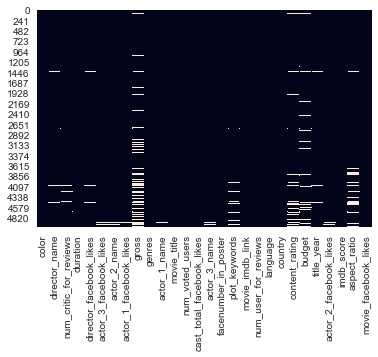

In [1171]:
# visualize missing data

sns.heatmap(df.isnull(), cbar=False);

In [1172]:
# Fixing data quality issues by removing rows with missing information

df = df.dropna()
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [1173]:
# Duplicate rows

df.duplicated().sum()

33

#### we will need to remove these duplicate rows

In [1174]:
df.drop_duplicates(keep = 'first', inplace = True)

In [1175]:
df.duplicated().sum()

0

### Checking columns for data quality issues

In [1176]:
df.groupby('genres').size().sort_values().head()

genres
Comedy|Horror|Musical                        1
Adventure|Biography|Drama|War                1
Comedy|Drama|Family|Fantasy|Sci-Fi           1
Adventure|Biography|Drama|Horror|Thriller    1
Comedy|Drama|Family|Musical                  1
dtype: int64

In [1177]:
df.groupby('country').size().sort_values().head(10)

country
Afghanistan      1
Poland           1
Peru             1
Official site    1
New Line         1
Israel           1
Indonesia        1
Iceland          1
Greece           1
Georgia          1
dtype: int64

#### Found data inaccuracy here: "Official site" and "New Line" are not countries

In [1178]:
df.groupby('language').size().sort_values().head(10)

language
Zulu         1
Arabic       1
Aramaic      1
Bosnian      1
Russian      1
Czech        1
Romanian     1
None         1
Mongolian    1
Maya         1
dtype: int64

In [1179]:
df.groupby('content_rating').size().sort_values().head()

content_rating
GP         1
M          2
Passed     3
NC-17      6
X         10
dtype: int64

In [1180]:
# Identifying value counts of important columns

df['director_name'].value_counts().head()

Steven Spielberg    25
Woody Allen         19
Clint Eastwood      19
Ridley Scott        17
Tim Burton          16
Name: director_name, dtype: int64

In [1181]:
df['genres'].value_counts().head()

Comedy|Drama|Romance    147
Drama                   140
Comedy|Drama            137
Comedy                  137
Comedy|Romance          131
Name: genres, dtype: int64

In [1182]:
df['budget'].value_counts().head()

20000000.0    155
30000000.0    133
15000000.0    130
40000000.0    129
25000000.0    124
Name: budget, dtype: int64

In [1183]:
df['country'].value_counts().head()

USA        2961
UK          313
France      101
Germany      79
Canada       59
Name: country, dtype: int64

In [1184]:
df['plot_keywords'].value_counts().head()

animal name in title|ape abducts a woman|gorilla|island|king kong                    3
alien friendship|alien invasion|australia|flying car|mother daughter relationship    3
fire|jungle|remake|tiger|wolf                                                        2
outcast|prom|self injury|telekinesis|tragic event                                    2
sandman|spider man|symbiote|venom|villain                                            2
Name: plot_keywords, dtype: int64

In [1185]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,167.040559,110.263497,809.864357,765.010207,7743.335751,5.248034e+07,1.055543e+05,11494.966694,1.376041,335.897663,4.623049e+07,2002.965351,2009.926403,6.465673,2.110682,9299.497717
std,123.345135,22.678325,3076.624412,1868.841589,15557.953218,6.980333e+07,1.515651e+05,19113.274232,2.045134,411.078619,2.269511e+08,9.892253,4531.151446,1.053644,0.353879,21426.654643
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,744.500000,8.124330e+06,1.959850e+04,1907.000000,0.000000,109.000000,1.000000e+07,1999.000000,383.500000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,436.000000,1000.000000,3.005003e+07,5.397700e+04,4050.000000,1.000000,209.000000,2.500000e+07,2004.000000,683.000000,6.600000,2.350000,226.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.690181e+07,1.285240e+05,16232.500000,2.000000,398.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


# 3. Data Preparation

In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
facenumber_in_poster         3723 non-null float64
plot_keywords                3723 non-null object
movie_imdb_link              3723 non-

In [1187]:
# removing unnecessary variables

df = df.drop(['aspect_ratio', 'movie_imdb_link', 'facenumber_in_poster'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 25 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null float64
duration                     3723 non-null float64
director_facebook_likes      3723 non-null float64
actor_3_facebook_likes       3723 non-null float64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null float64
gross                        3723 non-null float64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
plot_keywords                3723 non-null object
num_user_for_reviews         3723 non-null float64
language                     3723 non-

In [1188]:
convert_dict = {'num_critic_for_reviews': 'int64', 'duration': 'int64', 'director_facebook_likes': 'int64', 'actor_3_facebook_likes': 'int64', 'actor_1_facebook_likes': 'int64', 'gross': 'int64', 'num_user_for_reviews': 'int64', 'budget': 'int64', 'title_year': 'int64', 'actor_2_facebook_likes': 'int64'} 
  
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 25 columns):
color                        3723 non-null object
director_name                3723 non-null object
num_critic_for_reviews       3723 non-null int64
duration                     3723 non-null int64
director_facebook_likes      3723 non-null int64
actor_3_facebook_likes       3723 non-null int64
actor_2_name                 3723 non-null object
actor_1_facebook_likes       3723 non-null int64
gross                        3723 non-null int64
genres                       3723 non-null object
actor_1_name                 3723 non-null object
movie_title                  3723 non-null object
num_voted_users              3723 non-null int64
cast_total_facebook_likes    3723 non-null int64
actor_3_name                 3723 non-null object
plot_keywords                3723 non-null object
num_user_for_reviews         3723 non-null int64
language                     3723 non-null object
co

In [1189]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,avatar|future|marine|native|paraplegic,3054,English,USA,PG-13,237000000,2009,936,7.9,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,goddess|marriage ceremony|marriage proposal|pi...,1238,English,USA,PG-13,300000000,2007,5000,7.1,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,bomb|espionage|sequel|spy|terrorist,994,English,UK,PG-13,245000000,2015,393,6.8,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,deception|imprisonment|lawlessness|police offi...,2701,English,USA,PG-13,250000000,2012,23000,8.5,164000
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,alien|american civil war|male nipple|mars|prin...,738,English,USA,PG-13,263700000,2012,632,6.6,24000


#### Converting these floats to integers was important because if looking at the title_year column we had values such as 2009.0 this was unnecessary and somewhat confusing when looking at. In changing these values we made the data set a little easier to read.

In [1190]:
# Fixing data quality issues found earlier

df = df.replace('New Line', np.nan)
df = df.replace('Official site', np.nan)

In [1191]:
df = df.dropna()

In [1192]:
# Removing more unnecessary information

df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.227606,0.175661,0.245435,0.165548,0.460703,0.591518,0.233689,0.562530,0.103967,0.420263,0.251061,0.349584,0.703561
duration,0.227606,1.000000,0.180406,0.120785,0.082898,0.242625,0.338995,0.117742,0.352120,0.067407,-0.131773,0.126659,0.367454,0.212995
director_facebook_likes,0.175661,0.180406,1.000000,0.120569,0.090420,0.139667,0.302716,0.120027,0.218820,0.018110,-0.045687,0.117821,0.193083,0.162592
actor_3_facebook_likes,0.245435,0.120785,0.120569,1.000000,0.252436,0.281227,0.257618,0.485592,0.200465,0.038206,0.116515,0.550324,0.064164,0.259907
actor_1_facebook_likes,0.165548,0.082898,0.090420,0.252436,1.000000,0.142478,0.177906,0.946071,0.121291,0.016039,0.096042,0.390375,0.092729,0.128728
gross,0.460703,0.242625,0.139667,0.281227,0.142478,1.000000,0.622643,0.227861,0.545578,0.098344,0.053225,0.243913,0.215275,0.358549
num_voted_users,0.591518,0.338995,0.302716,0.257618,0.177906,0.622643,1.000000,0.243732,0.779149,0.065418,0.023571,0.239055,0.482508,0.514789
cast_total_facebook_likes,0.233689,0.117742,0.120027,0.485592,0.946071,0.227861,0.243732,1.000000,0.176128,0.027680,0.126715,0.640344,0.105209,0.199918
num_user_for_reviews,0.562530,0.352120,0.218820,0.200465,0.121291,0.545578,0.779149,0.176128,1.000000,0.070289,0.020133,0.184632,0.324884,0.368493
budget,0.103967,0.067407,0.018110,0.038206,0.016039,0.098344,0.065418,0.027680,0.070289,1.000000,0.046380,0.034696,0.029574,0.051069


#### looking at this we can see variables such as facebook likes have little to no correlation with a movies success so I will remove them from the dataframe

In [1193]:
df = df.drop(['language', 'color', 'movie_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'actor_3_facebook_likes', 'actor_3_name', ], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3721 entries, 0 to 5042
Data columns (total 18 columns):
director_name              3721 non-null object
num_critic_for_reviews     3721 non-null int64
duration                   3721 non-null int64
director_facebook_likes    3721 non-null int64
actor_2_name               3721 non-null object
actor_1_facebook_likes     3721 non-null int64
gross                      3721 non-null int64
genres                     3721 non-null object
actor_1_name               3721 non-null object
movie_title                3721 non-null object
num_voted_users            3721 non-null int64
plot_keywords              3721 non-null object
num_user_for_reviews       3721 non-null int64
country                    3721 non-null object
content_rating             3721 non-null object
budget                     3721 non-null int64
title_year                 3721 non-null int64
imdb_score                 3721 non-null float64
dtypes: float64(1), int64(9), object(

#### dropped columns "color" and "language" as they were predominately one sided and would have little to no affect on IMDB scores.

In [1194]:
df['profit'] = df['gross'] - df['budget']
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,profit
0,James Cameron,723,178,0,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,avatar|future|marine|native|paraplegic,3054,USA,PG-13,237000000,2009,7.9,523505847
1,Gore Verbinski,302,169,563,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238,USA,PG-13,300000000,2007,7.1,9404152
2,Sam Mendes,602,148,0,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994,UK,PG-13,245000000,2015,6.8,-44925825
3,Christopher Nolan,813,164,22000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701,USA,PG-13,250000000,2012,8.5,198130642
5,Andrew Stanton,462,132,475,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,alien|american civil war|male nipple|mars|prin...,738,USA,PG-13,263700000,2012,6.6,-190641321


In [1195]:
df['return_investment'] = (df['profit'] / df['budget']) *100
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,profit,return_investment
0,James Cameron,723,178,0,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,avatar|future|marine|native|paraplegic,3054,USA,PG-13,237000000,2009,7.9,523505847,220.888543
1,Gore Verbinski,302,169,563,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238,USA,PG-13,300000000,2007,7.1,9404152,3.134717
2,Sam Mendes,602,148,0,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994,UK,PG-13,245000000,2015,6.8,-44925825,-18.337071
3,Christopher Nolan,813,164,22000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701,USA,PG-13,250000000,2012,8.5,198130642,79.252257
5,Andrew Stanton,462,132,475,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,alien|american civil war|male nipple|mars|prin...,738,USA,PG-13,263700000,2012,6.6,-190641321,-72.294775


In [1196]:
# changing movie ratings to modern day ratings

df = df.replace('M', 'PG')
df = df.replace('GP', 'PG')
df = df.replace('X', 'NC-17')
df = df.replace('Approved', 'R')
df = df.replace('Not Rated', 'R')
df = df.replace('Unrated', 'R')
df = df.replace('Passed', 'R')

df['content_rating'].value_counts()

R        1762
PG-13    1290
PG        566
G          87
NC-17      16
Name: content_rating, dtype: int64

In [1197]:
# combining countries into category: "other"

df.country.iloc[[(df['country'] != 'USA') & (df['country'] != 'UK')]] = 'OTHER'
import warnings
warnings.filterwarnings("ignore")

In [1198]:
df['country'].value_counts()

USA      2961
OTHER     447
UK        313
Name: country, dtype: int64

In [1199]:
df['imdbscores_bins'] = pd.cut(df['imdb_score'], bins=[0, 2, 4, 6, 8, 10], labels=[1,2,3,4,5])
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,profit,return_investment,imdbscores_bins
0,James Cameron,723,178,0,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,avatar|future|marine|native|paraplegic,3054,USA,PG-13,237000000,2009,7.9,523505847,220.888543,4
1,Gore Verbinski,302,169,563,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,goddess|marriage ceremony|marriage proposal|pi...,1238,USA,PG-13,300000000,2007,7.1,9404152,3.134717,4
2,Sam Mendes,602,148,0,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,bomb|espionage|sequel|spy|terrorist,994,UK,PG-13,245000000,2015,6.8,-44925825,-18.337071,4
3,Christopher Nolan,813,164,22000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,deception|imprisonment|lawlessness|police offi...,2701,USA,PG-13,250000000,2012,8.5,198130642,79.252257,5
5,Andrew Stanton,462,132,475,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,...,alien|american civil war|male nipple|mars|prin...,738,USA,PG-13,263700000,2012,6.6,-190641321,-72.294775,4


#### a vast majority of the films made were either USA, or UK due to this all other countries have been grouped together in one.

# 4. Business intelligence
- pivot tables
- data visualization with business questions

### checking relationships between 'gross' and 'imdb_score'

In [1200]:
df2 = df[['gross', 'imdb_score']]
df2.head()

,gross,imdb_score
0,760505847,7.9
1,309404152,7.1
2,200074175,6.8
3,448130642,8.5
5,73058679,6.6


In [1201]:
df2.sort_values('gross', ascending=False).head(10)


,gross,imdb_score
0,760505847,7.9
26,658672302,7.7
29,652177271,7.0
17,623279547,8.1
66,533316061,9.0
240,474544677,6.5
3024,460935665,8.7
8,458991599,7.5
3,448130642,8.5
582,436471036,7.2


In [1202]:
df2.sort_values('gross', ascending=False).head(10).mean()

gross         5.507025e+08
imdb_score    7.810000e+00
dtype: float64

In [1203]:
df2.sort_values('gross', ascending=False).tail(10)

,gross,imdb_score
4434,3478,6.7
2589,2964,5.1
4399,2580,5.4
4845,2468,4.8
4333,2436,5.7
4758,1332,4.6
4915,1111,7.7
4606,721,4.1
4607,703,5.4
3330,162,5.7


In [1204]:
df2.sort_values('gross', ascending=False).tail(10).mean()

gross         1795.50
imdb_score       5.52
dtype: float64

#### we can see that there is a correlation between a movie's gross and the imdb score. the movies that earn the most on average have a score of 7.9 

### number of movies released over the years

Text(0, 0.5, 'amount of monvies released')

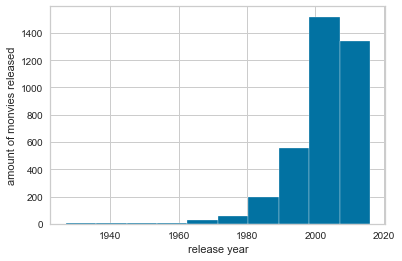

In [1205]:
plt.hist(df['title_year'])
plt.xlabel('release year')
plt.ylabel('amount of monvies released')

### Relation between genre and imdb_score

In [1206]:
genrescore = df[['genres','imdb_score']]
genrescore.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
5,Action|Adventure|Sci-Fi,6.6


In [1207]:
b = pd.DataFrame(genrescore.genres.str.split('|').tolist(), index=genrescore.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] 
b.columns = ['genres', 'imdb_score'] 
b2 = b.groupby('genres').agg({'imdb_score':'mean'}).reset_index()
b2

,genres,imdb_score
0,Action,6.289905
1,Adventure,6.452393
2,Animation,6.702551
3,Biography,7.157563
4,Comedy,6.189340
5,Crime,6.541903
6,Documentary,6.988889
7,Drama,6.792800
8,Family,6.216364
9,Fantasy,6.286310


Text(0.5, 0, 'imdb score')

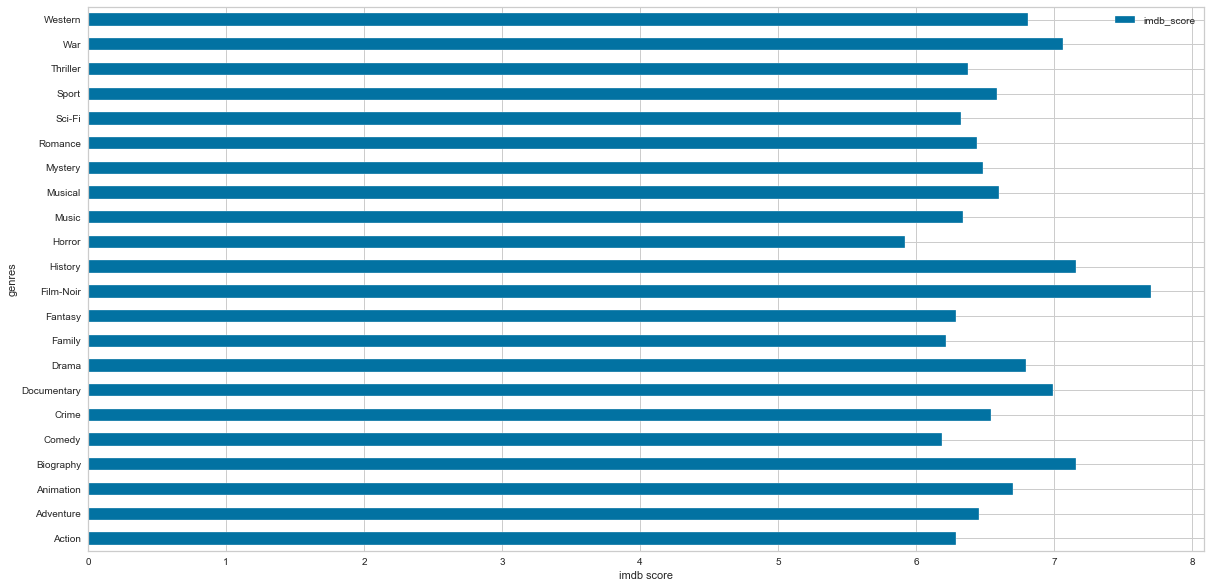

In [1208]:
b3 = b2.set_index('genres')
b3.plot(kind='barh', figsize=(20,10))
plt.xlabel('imdb score')


In [1209]:
dfdirector = df.groupby('director_name').agg({'imdb_score':'mean'}).sort_values('imdb_score', ascending=False).head().reset_index().set_index('director_name')
dfdirector

,imdb_score
director_name,
Akira Kurosawa,8.7
Charles Chaplin,8.6
Tony Kaye,8.6
Damien Chazelle,8.5
Majid Majidi,8.5


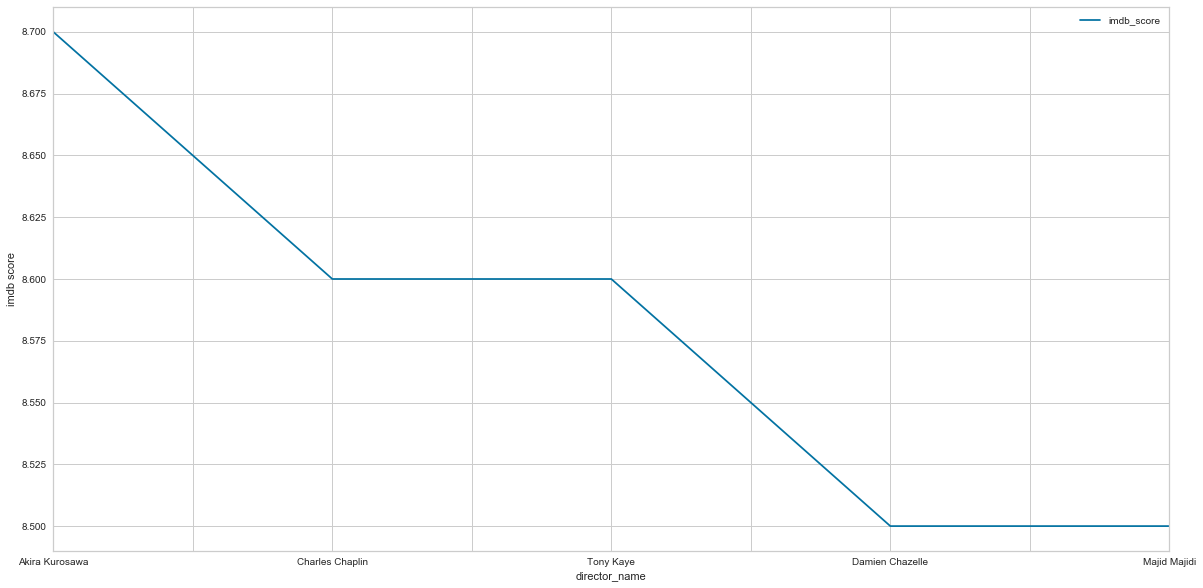

In [1210]:
dfdirector.plot(figsize=(20,10))
plt.ylabel('imdb score');

In [1211]:
dfp = df[['genres', 'content_rating', 'profit']]

dfp.sort_values('profit',ascending=False).head()


,genres,content_rating,profit
0,Action|Adventure|Fantasy|Sci-Fi,PG-13,523505847
29,Action|Adventure|Sci-Fi|Thriller,PG-13,502177271
26,Drama|Romance,PG-13,458672302
3024,Action|Adventure|Fantasy|Sci-Fi,PG,449935665
3080,Family|Sci-Fi,PG,424449459


In [1212]:
dfpivot = dfp.pivot_table(index='genres', columns='content_rating', values='profit', aggfunc='mean', fill_value=0)
dfpivot.head()

content_rating,G,NC-17,PG,PG-13,R
genres,,,,,
Action,0.0,0.0,0.0,3.255835e+07,-65247815.5
Action|Adventure,0.0,0.0,188122362.5,3.565297e+07,0.0
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,0.0,0.0,-56403089.0,0.000000e+00,0.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,0.0,0.0,5323508.0,0.000000e+00,0.0
Action|Adventure|Animation|Comedy|Family,0.0,0.0,47141083.6,0.000000e+00,0.0


In [1213]:
dfpivot2 = df.pivot_table(index='title_year', columns='content_rating', values='profit', aggfunc='mean', fill_value=0)
dfpivot2.tail()

content_rating,G,NC-17,PG,PG-13,R
title_year,,,,,
2012,0.0,0.0,1.543997e+07,2.508034e+07,1.001313e+07
2013,68488329.0,0.0,2.358720e+07,1.086361e+07,1.222122e+07
2014,28536019.0,0.0,2.586784e+07,1.494181e+07,2.058171e+07
2015,31174897.0,0.0,3.027407e+07,2.045725e+07,8.834144e+06
2016,0.0,0.0,6.007222e+07,-1.774985e+06,2.904904e+07


In [1214]:
dfpivot = df.pivot_table(index='country', columns='content_rating', values='profit', aggfunc='mean', fill_value=0)
dfpivot.head()

content_rating,G,NC-17,PG,PG-13,R
country,,,,,
OTHER,3.684781e+06,-1.248533e+07,-1.947045e+07,-4.110328e+07,-9.009730e+07
UK,8.257357e+06,-2.499696e+06,1.253749e+07,5.625870e+06,1.447557e+06
USA,4.338927e+07,1.157767e+07,2.873689e+07,1.881935e+07,1.151267e+07


In [1215]:
dfcountry = df.groupby('country').agg({'imdb_score':'mean'}).sort_values('imdb_score', ascending=False).head().reset_index().set_index('country')
dfcountry

,imdb_score
country,
UK,6.848882
OTHER,6.697987
USA,6.390848


Text(0, 0.5, 'imdb score')

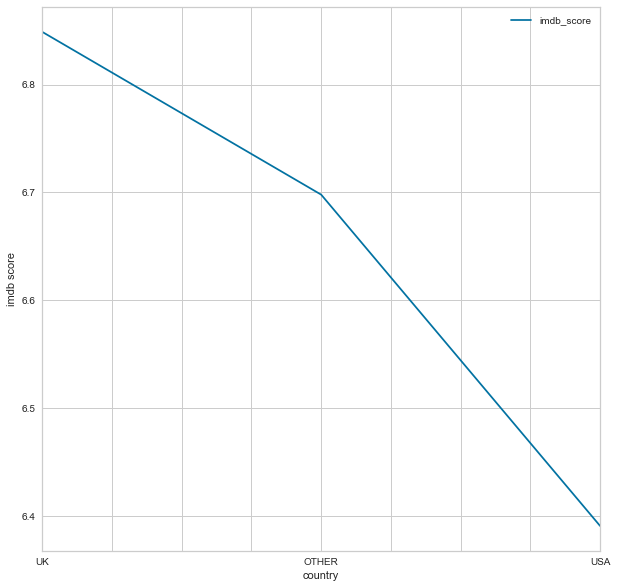

In [1216]:
dfcountry.plot(figsize=(10,10))
plt.ylabel('imdb score')

In [1217]:
dfcountry2 = df.groupby('country').agg({'budget':'mean'}).sort_values('budget', ascending=False).head().reset_index().set_index('country')
dfcountry2

,budget
country,
OTHER,9.214918e+07
USA,4.082870e+07
UK,3.171453e+07


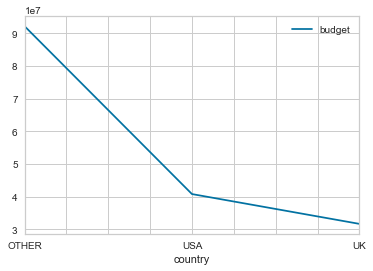

In [1218]:
dfcountry2.plot(); 

#### the US had the second highest budget yet also held the position for lowest average imdb score partially showing that budget cannot necessarily be used to predict a movies success

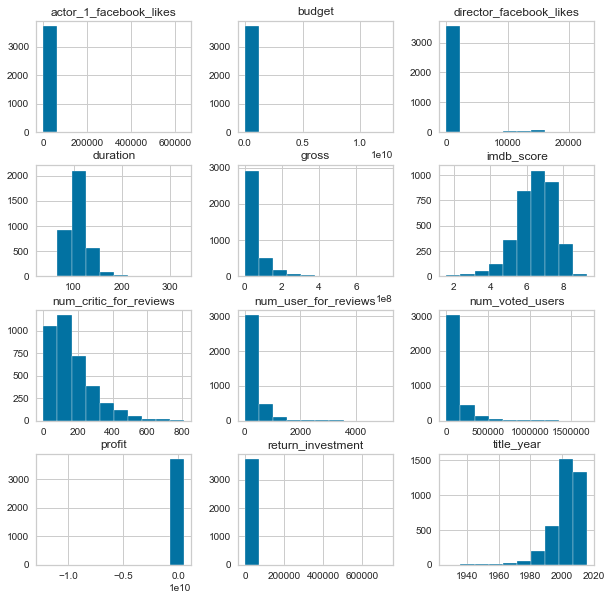

In [1219]:
df.hist(figsize=(10,10));

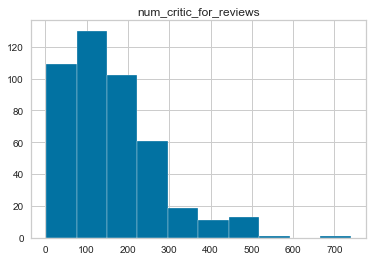

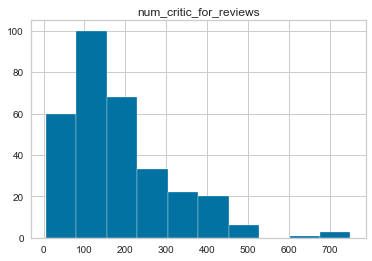

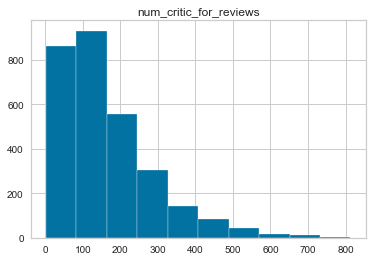

In [1220]:
df.groupby('country').hist('num_critic_for_reviews');


In [1221]:
dfcritic = df.groupby('num_critic_for_reviews').agg({'imdb_score':'mean'}).sort_values('imdb_score', ascending=False).head().reset_index().set_index('num_critic_for_reviews')
dfcritic

,imdb_score
num_critic_for_reviews,
645,9.0
642,8.8
712,8.6
813,8.5
765,8.5


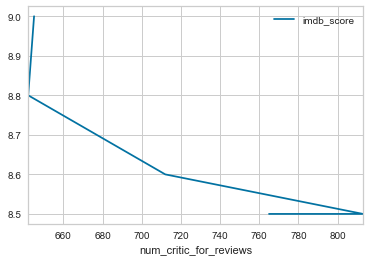

In [1222]:
dfcritic.plot()

# 5. Correlation analysis
- corr()
- heatmap()
- interpretation

In [1223]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit,return_investment
num_critic_for_reviews,1.000000,0.227606,0.175661,0.165548,0.460703,0.591518,0.562530,0.103967,0.420263,0.349584,0.037093,0.032498
duration,0.227606,1.000000,0.180406,0.082898,0.242625,0.338995,0.352120,0.067407,-0.131773,0.367454,0.007091,-0.033648
director_facebook_likes,0.175661,0.180406,1.000000,0.090420,0.139667,0.302716,0.218820,0.018110,-0.045687,0.193083,0.024431,-0.006556
actor_1_facebook_likes,0.165548,0.082898,0.090420,1.000000,0.142478,0.177906,0.121291,0.016039,0.096042,0.092729,0.027317,-0.016106
gross,0.460703,0.242625,0.139667,0.142478,1.000000,0.622643,0.545578,0.098344,0.053225,0.215275,0.205724,0.018053
num_voted_users,0.591518,0.338995,0.302716,0.177906,0.622643,1.000000,0.779149,0.065418,0.023571,0.482508,0.123977,0.009815
num_user_for_reviews,0.562530,0.352120,0.218820,0.121291,0.545578,0.779149,1.000000,0.070289,0.020133,0.324884,0.095880,0.068160
budget,0.103967,0.067407,0.018110,0.016039,0.098344,0.065418,0.070289,1.000000,0.046380,0.029574,-0.953634,-0.008114
title_year,0.420263,-0.131773,-0.045687,0.096042,0.053225,0.023571,0.020133,0.046380,1.000000,-0.132427,-0.029512,-0.015422
imdb_score,0.349584,0.367454,0.193083,0.092729,0.215275,0.482508,0.324884,0.029574,-0.132427,1.000000,0.036024,0.010047


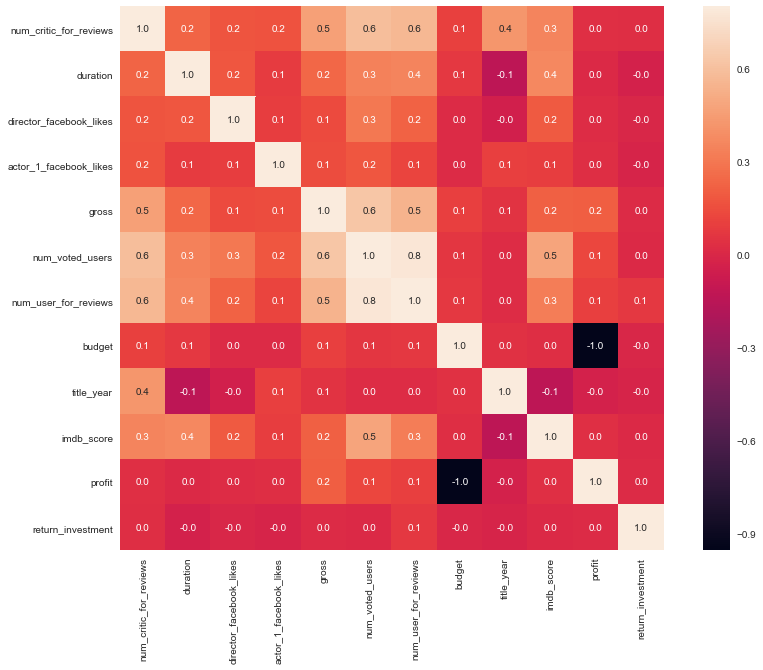

In [1224]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

### There is a relatively strong correlation between the number of votes and reviews conducted by users and the overall success of the movie in terms of of it's gross earnings. 
### There is also a positive correlation between the imdb score and the number of votes a movie has recieved.
### After viewing and attempting to analyze this data it became clear that predicting a movie's success is difficult as there is no secret to success.
### it is clear that there is a strong correlation between nonfiction films and a positive imdb score.

# 6. Regression Model Building

### Scikit model

In [1225]:
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users','num_user_for_reviews','budget','title_year','profit','return_investment']]

In [1226]:
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [1227]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,profit,return_investment
0,723,178,0,1000,760505847,886204,3054,237000000,2009,523505847,220.888543
1,302,169,563,40000,309404152,471220,1238,300000000,2007,9404152,3.134717


In [1228]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [1229]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.45374296e-03  9.97941393e-03  2.96792647e-06  4.34856663e-07
 -9.69457204e+03  3.59376754e-06 -5.86686898e-04  9.69457204e+03
 -2.38040513e-02  9.69457204e+03  1.42712104e-06]
y-intercept  52.571314011296735


In [1230]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,num_critic_for_reviews,2.453743e-03
1,duration,9.979414e-03
2,director_facebook_likes,2.967926e-06
3,actor_1_facebook_likes,4.348567e-07
4,gross,-9.694572e+03
5,num_voted_users,3.593768e-06
6,num_user_for_reviews,-5.866869e-04
7,budget,9.694572e+03
8,title_year,-2.380405e-02
9,profit,9.694572e+03


In [1231]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-9694.572'),
 ('num_voted_users', '0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '9694.572'),
 ('title_year', '-0.024'),
 ('profit', '9694.572'),
 ('return_investment', '0.000')]

In [1232]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7180385455434948
variance or r-squared:  0.35271523008655703


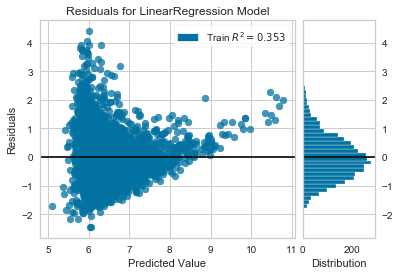

In [1233]:
from yellowbrick.regressor import ResidualsPlot

y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users','num_user_for_reviews','budget','title_year','profit','return_investment']]

regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  

visualizer.poof()   

### Statmodel

In [1234]:
runs_reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+num_user_for_reviews+budget+title_year+profit+return_investment",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:36:28   Log-Likelihood:                -4663.6
No. Observations:                3721   AIC:                             9349.
Df Residuals:                    3710   BIC:                             9418.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [1235]:
runs_reg.mse_resid

0.7201644460503904

In [1236]:
runs_reg.params

Intercept                  5.257701e+01
num_critic_for_reviews     2.449844e-03
duration                   9.973568e-03
director_facebook_likes    2.968125e-06
actor_1_facebook_likes     4.393816e-07
gross                     -2.921372e-06
num_voted_users            3.595233e-06
num_user_for_reviews      -5.867459e-04
budget                     2.918985e-06
title_year                -2.380659e-02
profit                     2.919017e-06
return_investment          1.427269e-06
dtype: float64

### Regression based on regularization

In [1237]:
y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users','num_user_for_reviews','budget','title_year','profit','return_investment']]

In [1238]:
model1 = linear_model.Lasso(alpha=0.1)             
model1.fit(X, y)
model1_y = model1.predict(X)
import warnings
warnings.filterwarnings("ignore")

In [1239]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.36417958e-03  9.84487680e-03  3.33338436e-06  4.00379131e-07
 -2.05039946e-09  3.61702146e-06 -5.77384256e-04 -3.27818599e-10
 -2.23827749e-02 -2.96305167e-10  1.43842383e-06]
y-intercept  49.747750574471375


In [1240]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.022'),
 ('profit', '-0.000'),
 ('return_investment', '0.000')]

In [1241]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7182002171224275
variance or r-squared:  0.3525694881637945


### Feature Selection

In [1242]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new[:5]

array([[1.780000e+02, 8.862040e+05],
       [1.690000e+02, 4.712200e+05],
       [1.480000e+02, 2.758680e+05],
       [1.640000e+02, 1.144337e+06],
       [1.320000e+02, 2.122040e+05]])

In [1243]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 5]


In [1244]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,profit,return_investment
0,723,178,0,1000,760505847,886204,3054,237000000,2009,523505847,220.888543
1,302,169,563,40000,309404152,471220,1238,300000000,2007,9404152,3.134717


- Feature selection has chosen "duration" and "num_voted_users" as the most important predictors

In [1245]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7989452581902674
variance or r-squared:  0.2797808673579676


### Normalize

In [1246]:
from sklearn.preprocessing import Normalizer

y = df['imdb_score'] 
X = df[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users','num_user_for_reviews','budget','title_year','profit','return_investment']]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX


array([[ 7.58494745e-07,  1.86738679e-07,  0.00000000e+00, ...,
         2.10762924e-06,  5.49206686e-01,  2.31732779e-07],
       [ 7.00585578e-07,  3.92049545e-07,  1.30605854e-06, ...,
         4.65587833e-06,  2.18159380e-02,  7.27197932e-09],
       [ 1.88426021e-06,  4.63240053e-07,  0.00000000e+00, ...,
         6.30695072e-06, -1.40617848e-01, -5.73950401e-08],
       ...,
       [ 2.38230828e-04,  1.28278138e-04,  4.84791406e-04, ...,
         3.33856349e-03,  6.95967208e-01,  9.94238869e-03],
       [ 1.94311051e-05,  2.81057056e-05,  0.00000000e+00, ...,
         6.91192168e-04,  7.05737739e-01,  1.00819677e-02],
       [ 3.58067422e-04,  7.49443442e-04,  1.33234390e-04, ...,
         1.66876073e-02,  7.00496458e-01,  6.36814962e-02]])

In [1247]:
model = lm.LinearRegression()
model.fit(normalizedX, y)
model_y = model.predict(normalizedX)
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [ 1.78222296e+03  1.81902657e+04 -6.41875912e+00 -1.17886100e+01
 -2.09108089e-01  3.50225434e+01 -5.12656499e+03 -5.37392956e-01
 -8.06993919e+02  3.28284845e-01  2.09165238e+00]
y-intercept  6.824323145974303


In [1248]:
print("mean square error: ", mean_squared_error(y, model_y))
print(explained_variance_score(y, model_y))

mean square error:  0.9964706675938677
0.10171913211759898


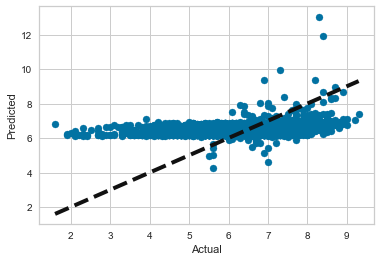

In [1249]:
plt.subplots()
plt.scatter(y, model_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

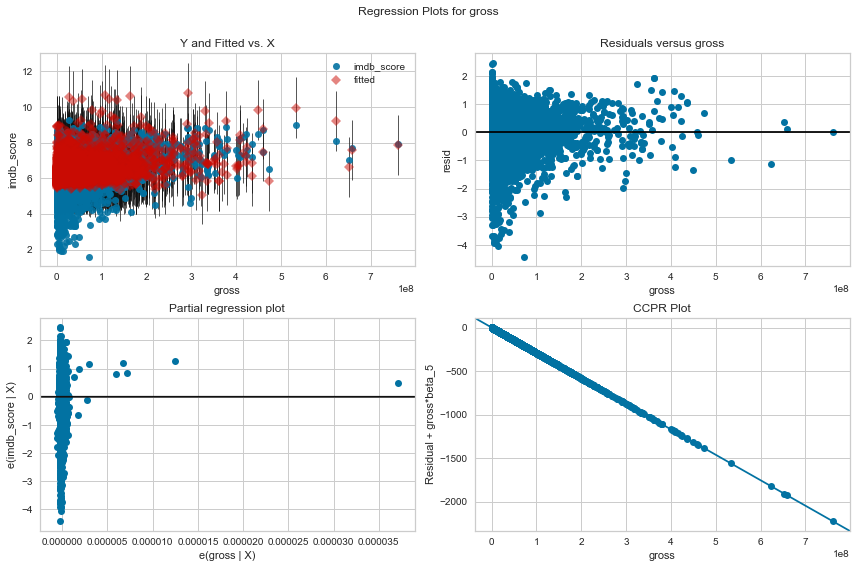

In [1250]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(runs_reg, "gross", fig=fig)

### RandomForrestRegressor for Feature selection

In [1251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

y = df['imdb_score']
X = df[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users','num_user_for_reviews','budget','title_year','profit','return_investment']]


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06841024321418977
variance or r-squared:  0.9383624860733002


- Random Forrest Regressor for Feature Selection is by far the most accurate of all the regression model at roughly 94% accurate.

In [1252]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.029937166329981345, 'profit'),
 (0.03825289599927806, 'return_investment'),
 (0.041591955639718084, 'director_facebook_likes'),
 (0.04817208398236228, 'actor_1_facebook_likes'),
 (0.051489001903991374, 'title_year'),
 (0.06292621865883855, 'num_critic_for_reviews'),
 (0.06605614776280574, 'gross'),
 (0.07760101811365833, 'num_user_for_reviews'),
 (0.11975686717993432, 'budget'),
 (0.12392984035796184, 'duration'),
 (0.34028680407146994, 'num_voted_users')]

In [1253]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
num_voted_users,0.340287
duration,0.123930
budget,0.119757
num_user_for_reviews,0.077601
gross,0.066056
num_critic_for_reviews,0.062926
title_year,0.051489
actor_1_facebook_likes,0.048172
director_facebook_likes,0.041592
return_investment,0.038253


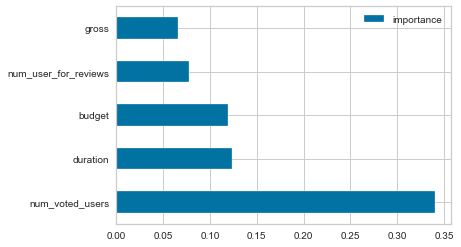

In [1254]:
feature_importances.head().plot(kind='barh')

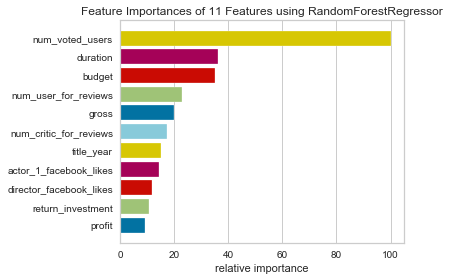

In [1255]:
from yellowbrick.features import FeatureImportances

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(RandomForestRegressor(n_estimators=100), ax=ax)
viz.fit(X, y)
viz.poof();

# 7. Classification models

Import packages 

In [1256]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

Categorizing imdb score

In [1257]:
def func(x):
    if 0 < x < 4:
        return '0'
    elif 4 <= x <= 6:
        return '1'
    elif 6 <= x < 8:
        return '2'
    return '3'

df['imdbscore_category'] = df['imdb_score'].apply(func)

In [1258]:
df =  pd.get_dummies(df, columns=["country", "content_rating"],
                         prefix=["country", "content_rating"],
                         drop_first=True)
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,profit,return_investment,imdbscores_bins,imdbscore_category,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,James Cameron,723,178,0,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,523505847,220.888543,4,2,0,1,0,0,1,0
1,Gore Verbinski,302,169,563,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,9404152,3.134717,4,2,0,1,0,0,1,0


In [1259]:
y = df['imdbscore_category']
X = df.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'plot_keywords', 'imdbscore_category', 'imdb_score', 'imdbscores_bins'], axis = 1)

### Split Validation

In [1260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = DecisionTreeClassifier()


dt = dt.fit(X_train, y_train)

In [1261]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6606982990152194
--------------------------------------------------------
[[  1  18  10   0]
 [  7 170 146   0]
 [  8 146 524  19]
 [  0   1  24  43]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.06      0.03      0.04        29
           1       0.51      0.53      0.52       323
           2       0.74      0.75      0.75       697
           3       0.69      0.63      0.66        68

    accuracy                           0.66      1117
   macro avg       0.50      0.49      0.49      1117
weighted avg       0.66      0.66      0.66      1117

--------------------------------------------------------


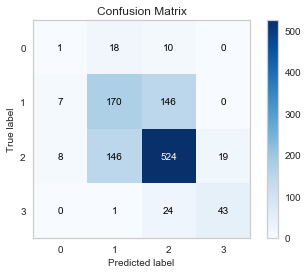

In [1262]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

- Looking at the confusion matrix we see that the model accurately predicted the imdb category for scores between 6 - 8 over 500 times making it more accurate than inaccurate.

### simpler decision tree

In [1263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt_simple = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)

dt_simple = dt_simple.fit(X_train, y_train)
dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1264]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
import warnings
warnings.filterwarnings("ignore")

0.6929274843330349
--------------------------------------------------------
[[  0   8  13   0]
 [  0 125 196   0]
 [  0  78 625   6]
 [  0   0  42  24]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.59      0.39      0.47       321
           2       0.71      0.88      0.79       709
           3       0.80      0.36      0.50        66

    accuracy                           0.69      1117
   macro avg       0.53      0.41      0.44      1117
weighted avg       0.67      0.69      0.67      1117

--------------------------------------------------------


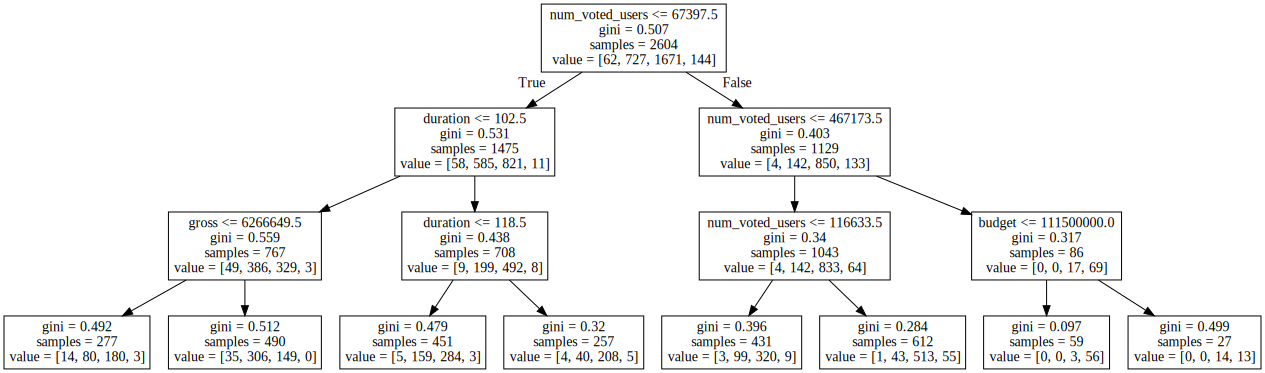

In [1265]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

### 10-fold cross validation

In [1266]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.57640751 0.63538874 0.60321716 0.65053763 0.70967742 0.6155914
 0.66935484 0.62365591 0.60916442 0.65498652]
0.6347981552523039


In [1267]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.07)


### Random Forrest Classifier

In [1268]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7233661593554163

In [1269]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7233661593554163
[[  1  13   7   0]
 [  0 168 153   0]
 [  0  89 612   8]
 [  0   0  39  27]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.62      0.52      0.57       321
           2       0.75      0.86      0.81       709
           3       0.77      0.41      0.53        66

    accuracy                           0.72      1117
   macro avg       0.79      0.46      0.50      1117
weighted avg       0.72      0.72      0.71      1117



- Random forrest classifier is the most accurate classification model at 75% accurate

In [1270]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.166992
duration,0.101676
gross,0.088359
num_user_for_reviews,0.084651
num_critic_for_reviews,0.082983
budget,0.081306
return_investment,0.072396
profit,0.070730
director_facebook_likes,0.068247
actor_1_facebook_likes,0.067410


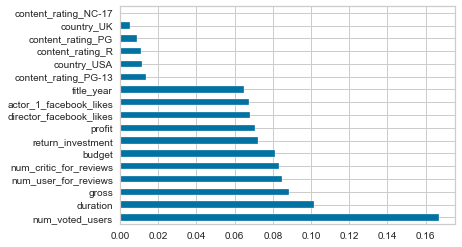

In [1271]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

### KNN Classifier

In [1272]:
y = df['imdbscore_category']
X = df.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'plot_keywords', 'imdbscore_category', 'imdb_score', 'imdbscores_bins'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1273]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.5684870188003581
--------------------------------------------------------
[[  0   2  27   0]
 [  0  96 226   1]
 [  2 150 536   9]
 [  0  10  55   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.37      0.30      0.33       323
           2       0.64      0.77      0.70       697
           3       0.23      0.04      0.07        68

    accuracy                           0.57      1117
   macro avg       0.31      0.28      0.28      1117
weighted avg       0.52      0.57      0.53      1117

--------------------------------------------------------


#### evaluate KNN using 10 fold cross validation

In [1274]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.55495979 0.43967828 0.49061662 0.47580645 0.44892473 0.37365591
 0.39516129 0.39784946 0.4690027  0.64420485]
0.46898600883211844


### Feature Selection

In [1275]:
y = df['imdbscore_category']
X = df.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'plot_keywords', 'imdbscore_category', 'imdb_score', 'imdbscores_bins', 'profit', 'return_investment'], axis = 1)

print(X.shape, y.shape)

(3721, 15) (3721,)


In [1276]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[760505847    886204 237000000]
 [309404152    471220 300000000]
 [200074175    275868 245000000]
 ...
 [   424760     72639      7000]
 [  2040920     52055      7000]
 [    85222      4285      1100]]


In [1277]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[4 5 7]


In [1278]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,723,178,0,1000,760505847,886204,3054,237000000,2009,0,1,0,0,1,0


In [1279]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

In [1280]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6195165622202328
--------------------------------------------------------
[[  2  10   9   0]
 [ 12 158 148   3]
 [ 20 165 496  28]
 [  0   3  27  36]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.06      0.10      0.07        21
           1       0.47      0.49      0.48       321
           2       0.73      0.70      0.71       709
           3       0.54      0.55      0.54        66

    accuracy                           0.62      1117
   macro avg       0.45      0.46      0.45      1117
weighted avg       0.63      0.62      0.62      1117

--------------------------------------------------------


In [1281]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)


#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
import warnings
warnings.filterwarnings("ignore")

0.6016114592658908
[[  0   2  19   0]
 [  0  15 303   3]
 [  0  10 621  78]
 [  0   0  30  36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.56      0.05      0.09       321
           2       0.64      0.88      0.74       709
           3       0.31      0.55      0.39        66

    accuracy                           0.60      1117
   macro avg       0.38      0.37      0.30      1117
weighted avg       0.58      0.60      0.52      1117



### Recursive Feature Selection

In [1282]:
model = LogisticRegression()
rfe = RFE(model, 5) 
rfe = rfe.fit(X, y)
print((rfe.support_))
print((rfe.ranking_))
import warnings
warnings.filterwarnings("ignore")

[False False False False False False False False False  True  True False
  True  True  True]
[ 3  2  6  7  9  8  5 11  4  1  1 10  1  1  1]


In [1283]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
0,723,178,0,1000,760505847,886204,3054,237000000,2009,0,1,0,0,1,0


In [1284]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,num_critic_for_reviews,3
1,duration,2
2,director_facebook_likes,6
3,actor_1_facebook_likes,7
4,gross,9
5,num_voted_users,8
6,num_user_for_reviews,5
7,budget,11
8,title_year,4
9,country_UK,1


In [1285]:
X_logistic = df[['country_UK', 'country_USA', 'content_rating_PG', 'content_rating_PG-13', 'content_rating_R']]
print(X_logistic.head())

   country_UK  country_USA  content_rating_PG  content_rating_PG-13  \
0           0            1                  0                     1   
1           0            1                  0                     1   
2           1            0                  0                     1   
3           0            1                  0                     1   
5           0            1                  0                     1   

   content_rating_R  
0                 0  
1                 0  
2                 0  
3                 0  
5                 0  


In [1286]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)


print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6347358997314234
[[  0   0  21   0]
 [  0   0 321   0]
 [  0   0 709   0]
 [  0   0  66   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00       321
           2       0.63      1.00      0.78       709
           3       0.00      0.00      0.00        66

    accuracy                           0.63      1117
   macro avg       0.16      0.25      0.19      1117
weighted avg       0.40      0.63      0.49      1117



### Feature importance

In [1287]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

print((model_extra.feature_importances_))

1.0
[0.10312023 0.11580645 0.08091899 0.08153901 0.09695386 0.1732316
 0.10112275 0.10017179 0.09022864 0.01088982 0.01497478 0.00116049
 0.0051741  0.01175027 0.01295723]


In [1288]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0012, 'content_rating_NC-17'), (0.0052, 'content_rating_PG'), (0.0109, 'country_UK'), (0.0118, 'content_rating_PG-13'), (0.013, 'content_rating_R'), (0.015, 'country_USA'), (0.0809, 'director_facebook_likes'), (0.0815, 'actor_1_facebook_likes'), (0.0902, 'title_year'), (0.097, 'gross'), (0.1002, 'budget'), (0.1011, 'num_user_for_reviews'), (0.1031, 'num_critic_for_reviews'), (0.1158, 'duration'), (0.1732, 'num_voted_users')]


In [1289]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.173232
duration,0.115806
num_critic_for_reviews,0.103120
num_user_for_reviews,0.101123
budget,0.100172
gross,0.096954
title_year,0.090229
actor_1_facebook_likes,0.081539
director_facebook_likes,0.080919
country_USA,0.014975


- Number of users who voted is still the most important feature 

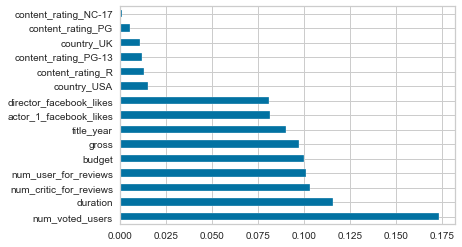

In [1290]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

- Looking at this model we can see that the difference between the variables are much less. The number of users who voted still have the largest impact on the imdb scores however its not by as drastic of a margin as before

# 8. Clustering

In [1291]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn import tree

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import IFrame
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [1292]:
del df['director_name']
del df['actor_2_name']
del df['genres']
del df['actor_1_name']
del df['movie_title']
del df['plot_keywords']
del df['imdbscores_bins']

In [1293]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [1294]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [1295]:
k_means.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [1296]:
k_means.cluster_centers_

array([[ 2.78420833e+02,  1.20862500e+02,  1.61193958e+03,
         1.15499917e+04,  1.96654338e+08,  3.06949002e+05,
         7.87360417e+02,  9.27937289e+07,  2.00356667e+03,
         7.02395833e+00,  1.03860610e+08,  2.38698361e+03,
         2.03750000e+00,  4.58333333e-02,  9.00000000e-01,
         2.94902991e-17,  2.60416667e-01,  4.91666667e-01,
         2.00000000e-01],
       [ 3.63000000e+02,  1.10000000e+02,  5.84000000e+02,
         6.29000000e+02,  2.20141200e+06,  6.88830000e+04,
         2.79000000e+02,  1.22155000e+10,  2.00600000e+03,
         7.00000000e+00, -1.22132986e+10, -9.99819785e+01,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 1.38500000e+02,  1.20750000e+02,  1.53075000e+03,
         5.26750000e+02,  7.79033500e+05,  7.35975000e+04,
         2.06250000e+02,  2.80687997e+09,  2.00275000e+03,
         7.52500000e+00, -2.80610094e+09, -9.99680193e+01,
    

In [1297]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,3


In [1298]:
df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit,return_investment,imdbscore_category,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,cluster
0,723,178,0,1000,760505847,886204,3054,237000000,2009,7.9,523505847,220.888543,2,0,1,0,0,1,0,0.0
1,302,169,563,40000,309404152,471220,1238,300000000,2007,7.1,9404152,3.134717,2,0,1,0,0,1,0,0.0
2,602,148,0,11000,200074175,275868,994,245000000,2015,6.8,-44925825,-18.337071,2,1,0,0,0,1,0,0.0
3,813,164,22000,27000,448130642,1144337,2701,250000000,2012,8.5,198130642,79.252257,3,0,1,0,0,1,0,0.0
5,462,132,475,640,73058679,212204,738,263700000,2012,6.6,-190641321,-72.294775,2,0,1,0,0,1,0,0.0


### Profiling each cluster

In [1299]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit,return_investment,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
cluster,,,,,,,,,,,,,,,,,,
0.0,241.468037,118.127854,1174.735160,11000.805936,1.036236e+08,182550.552511,559.079909,9.382808e+07,2006.337900,6.516895,9.795477e+06,5.698400,0.089041,0.824201,0.000000,0.198630,0.500000,0.264840
1.0,96.000000,106.000000,61.000000,907.000000,3.264555e+07,8427.000000,88.000000,1.400000e+07,2005.000000,6.400000,1.864555e+07,133.182471,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2.0,90.000000,106.666667,5341.666667,10157.333333,2.283544e+07,32063.666667,162.333333,2.100000e+07,2000.666667,5.633333,1.835442e+06,10.021920,0.333333,0.666667,0.000000,0.333333,0.333333,0.333333
3.0,163.201619,110.988227,843.301325,7904.342899,5.203406e+07,104172.949963,323.814570,4.466690e+07,2003.047829,6.419169,7.367161e+06,110.362676,0.082046,0.803164,0.002575,0.158940,0.363870,0.450331


In [1300]:
df2.groupby(['cluster']).count()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit,return_investment,imdbscore_category,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
cluster,,,,,,,,,,,,,,,,,,,
0.0,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3.0,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718


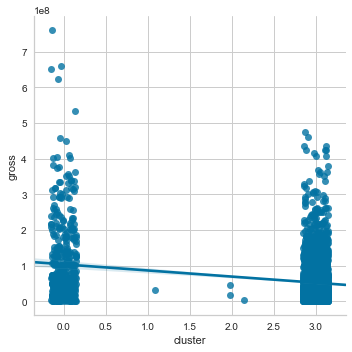

In [1301]:
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15);

In [1302]:
df2.groupby(['cluster']).size()

cluster
0.0     438
1.0       1
2.0       3
3.0    2718
dtype: int64

In [1303]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit,return_investment,country_UK,country_USA,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R
cluster,,,,,,,,,,,,,,,,,,
0.0,241.468037,118.127854,1174.735160,11000.805936,1.036236e+08,182550.552511,559.079909,9.382808e+07,2006.337900,6.516895,9.795477e+06,5.698400,0.089041,0.824201,0.000000,0.198630,0.500000,0.264840
1.0,96.000000,106.000000,61.000000,907.000000,3.264555e+07,8427.000000,88.000000,1.400000e+07,2005.000000,6.400000,1.864555e+07,133.182471,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2.0,90.000000,106.666667,5341.666667,10157.333333,2.283544e+07,32063.666667,162.333333,2.100000e+07,2000.666667,5.633333,1.835442e+06,10.021920,0.333333,0.666667,0.000000,0.333333,0.333333,0.333333
3.0,163.201619,110.988227,843.301325,7904.342899,5.203406e+07,104172.949963,323.814570,4.466690e+07,2003.047829,6.419169,7.367161e+06,110.362676,0.082046,0.803164,0.002575,0.158940,0.363870,0.450331


- Cluster Two are movies that are not box office hits. These are movies that could classify as independent films or those that belong to genres that are not part of the major grouping of "action" "romance" "comedy" "horror" or "drama".
- Cluster one and three are awfully similar in the fact that they are movies that are relatively popular with large budgets however cluster one are movies that are generally pg-13 and made in the US 


# 9. Storytelling

### IMDB, Gross, and Profit are just a few of many ways to represent the success of a movie. To some, a high IMDB score is what qualifies a movie as being successful; to others it depends strictly on how much money a movie brings in at the box office. Regardless of how we choose to represent a movie's success we can determine what factors play into it's outcome. That was the purpose and goal of this project. 
### In order to determine a movie's success we needed a large set of data which could be processed and analyzed. For this analysis I used the file "movie_metadata.csv" which contains information collected from thousands of movies containing a plethora of categories ranging from likes on an actors facebook page to whether or not the movie was released in color or black and white.
### Once the data is imported it needs to be evaluated for any errors or inconsistencies which would prevent us from getting the most accurate results. Without completely accurate results any data preperation or business intelligence outputs could be skewed or completely wrong if there is enough poor data in our set. In reviewing the data I have found:
- Over 1,000 missing values
- 33 duplicated rows
- Inaccurate information within country column (values that are not countries)
- Content ratings from different eras (different methods of classifying rating)
- Irrelevant informtion (imdb link, aspect ratio, etc.)
### Information like this, if not cleaned up and taken care of, can greatly alter the results of any analysis given there is enough missing values. Understanding what is in our data is crucial in setting up for the next step which is preparing the data.
### For prepairing the data I took all the errors and inaccuracy within the data set and fixed it using several processes including:
- Removing rows from dataset containing mass amounts of missing values
- Deleting duplicate rows while keeping the first set of information among the duplicates (drop_duplicates(keep='first'))
- Changing data type of floats to int64'a
- Created new columns in the dataframe "profit" and "return_investment" which utilize columns "gross", "budget", and "profit".
- Checking value counts and creating bins for imdb scores.
### Once the data is processed, analyzing the data can begin, this is where we gather useful information that answers business questions. In this case I am looking to find any correlations between the columns in the data frame and the success of a movie. This is the main point of the project. In running my analysis I have found several correlations and useful information which can be used to further analyze the data. For starters, I have broken down the genres column into individual genres and grouped them by their average imdb score to determine which genre is most successful. In doing so I've found "Film-Noir" to be the best with an average score of 7.7 However, this does not tell the complete story as there is very few movies in the dataset with that genre. Had there been hundreds the results would even out towards the middle. Along with providing charts and visuals to help analyze the data I've also created several pivot tables organized by grouping to help uncover any correlations or connections between several factors. With all being said and done these are the results I've concluded:
- Film Noir statistically gives the best shot at a successful movie via imdb rating however, data is not completely relavant
- Non Fiction films greatly outrank fiction in relation to average imdb rating however, do not fair as well in box office.
- Directors Akira Kurosawa, Charles Chaplin, and Tony Kaye had the highest average imdb scores at 8.7 and 8.6 respectively
- If one wanted to produce a successful movie in terms of profit, an action movie rated PG-13 provides highest profits
- US ranks last in imdb scores however, after running another analysis the US has highest number of critical reviews which would result in lower average imdb scores
- US is second in budget
- a movie from the UK with a G rating will likely provide largest profits followed by UK movie with PG-13 rating.
### These are just some of the information gathered through the use of analyzing the dataset. With this one could continue to analyze and come up with even more variables to predict movie success. 
### Running a correlation analysis shows that there is a relatively strong correlation between number of critical reviews and imdb score as well as user votes. Interestingly enough imdb score had little to no correlation with movie profits or gross earnings. Looking at the correlation analysis it becomes obvious how some factors are correlated such as the number of critical reviews and imdb score, however, factors such as directors, actors, and genre show to have little to no affect on profits, imdb score, gross earnings which goes against what one would assume. After viewing and analyzing the data I have concluded that trying to predict movie success is not as simple as marking a few boxes when creating a movie. There are box office hits that have poor ratings or movies that are critically acclaimed but deemed "boring" to the public and flop in the box office. Time period and hype going into a movie also play a role in the outcome of both imdb scores and box office success. There are so many factors and variables at play that I believe nobody can 100% predict a movie's success.
### After running the regression models I found that the Random Forrest Regressor for Feature Selection is by far the most accurate of all the regression model at roughly 94% accurate roughly 24 percent more accurate than the next most accurate model in predicting imdb scores. 
### following this I ran classification models starting by grouping the imdb scores into four bins. bin one being scores less than 4, bin two being scores between 4 and 6, the third, scores between 6 and 8 with the last bin being scores 8 and above. After creating these bins and running classification models I found that the Random Forrest Classifier was the most accurate at 75%  accurately prediciting movies that fall into bin 3 being scores between 6-8. This model accurately predicted this 628 times.
### Lastly, I had preformed clustering on the data set and grouping it into four clusters. I found that, there were 438 results in cluster 1 with one result in cluster 2, three results in cluster 3 and lastly, 2718 results in cluster 4. I have identified some of the clusters with cluster two being movies that are not box office hits. These are movies that could classify as independent films or those that belong to genres that are not part of the major grouping of "action" "romance" "comedy" "horror" or "drama". Cluster one and three are awfully similar in the fact that they are movies that are relatively popular with large budgets however cluster one are movies that are generally pg-13 and made in the US. 
### I found that the most important variables were the number of users who voted and movie duration. These had the largest affect and most importance in predicting a movies success via imdb scores. 
### my suggestions for movie producers is with number of user reviews aside, to create a movie with a decent budget and actors. these are factors that have proven to have an importance in a movies success and when thinking about it this makes sense in that a movie in this era generally needs high production value. While in order for a movie to be enjoyable enough to watch should have beloved and talented actors. 

# References:
- www.stackoverflow.com
- pandas.pydata.org
- www.geeksforgeeks.org
- Class midterm discussion page